In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [42]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [43]:
print(iris.feature_names)
print(iris.data[:10])
print(iris.target_names)
print(iris.target[:10])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0]


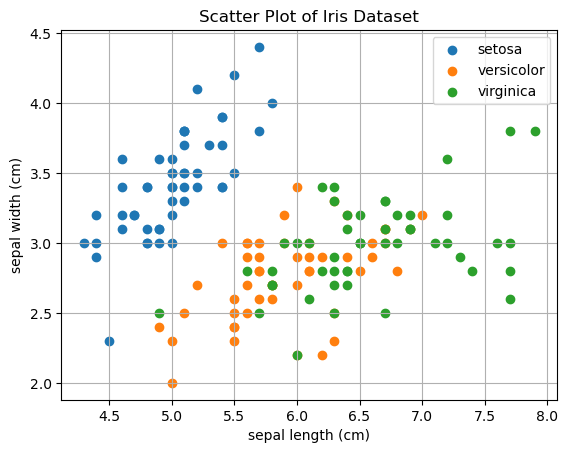

In [44]:

# Load the Iris dataset
iris = datasets.load_iris()

# Extract the first two features for x and the target for y
x = iris.data[:, :2]  # Only the first two features
y = iris.target  # Target labels

# Create the scatter plot for each class
for class_index, class_label in enumerate(iris.target_names):
    plt.scatter(
        x[y == class_index, 0],  # Select the first feature for the class
        x[y == class_index, 1],  # Select the second feature for the class
        label=class_label
    )

# Add labels and title
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Scatter Plot of Iris Dataset')
plt.legend()  # Show class labels in legend
plt.grid()

# Show the plot
plt.show()


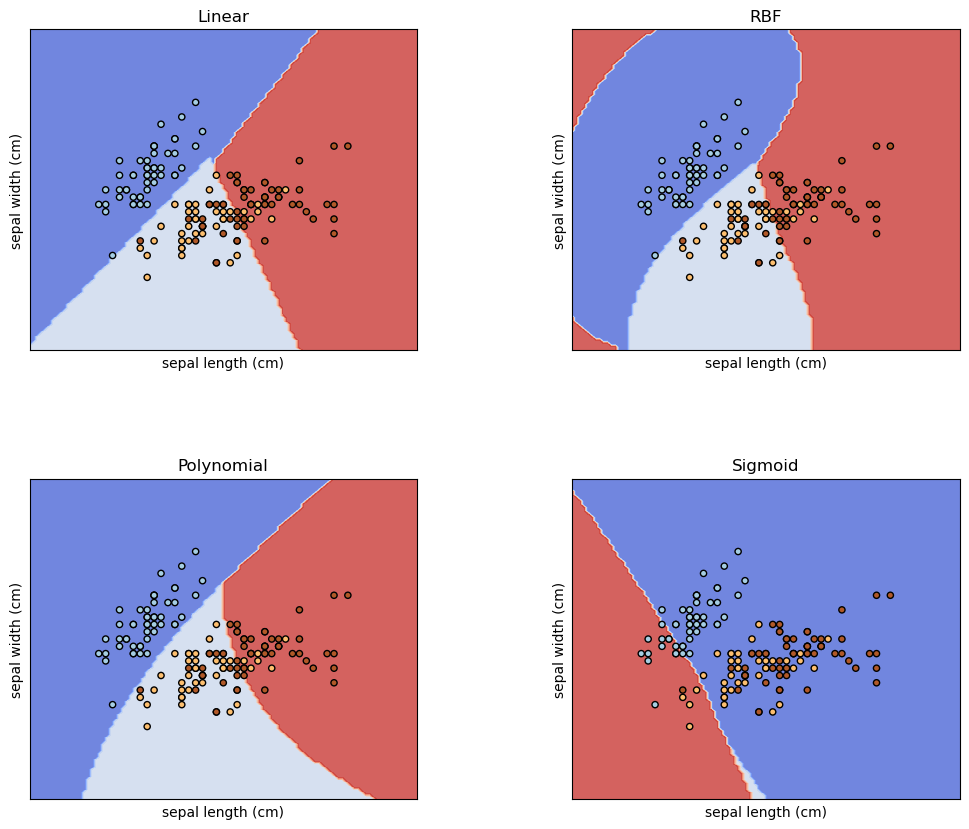

In [61]:
models = (
    svm.SVC(kernel="linear"),
    svm.SVC(kernel="rbf", gamma=0.7),
    svm.SVC(kernel="poly", gamma="scale", degree=3),
    svm.SVC(kernel="sigmoid")
)

# Fit each model
models = [clf.fit(x,y) for clf in models]
model_names = ["Linear", "RBF", "Polynomial", "Sigmoid"]

fig,sub = plt.subplots(2, 2, figsize=(12, 10)) 
plt.subplots_adjust(wspace=0.4,hspace=0.4)
x0,x1 = x[:,0],x[:,1]

# Loop through models and create decision boundaries
for clf, title, ax in zip(models, model_names, sub.flatten()):
    # Plot decision boundary
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        x,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )

    # Scatter plot of the data points
    ax.scatter(x0,x1, c=y, s=20, edgecolors="k", cmap=plt.cm.Paired)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

# Show the plot
plt.show()


